# Import Relevant Libraries

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

# Specify STyle

In [2]:
style.use('fivethirtyeight')

# Declare Dataset

In [3]:
Xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64) #change to arrays
Ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)

In [4]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    Ys = []
    for i in range(hm):
        y =  val + random.randrange(-variance, variance)
        Ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    Xs = [i for i in range(len(Ys))] 
    return np.array(Xs, dtype=np.float64), np.array(Ys, dtype=np.float64)


# Visualize Dataset

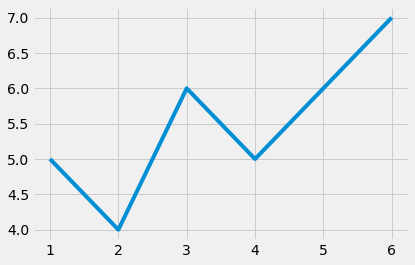

In [5]:
plt.plot(Xs, Ys)
plt.show() #Making it a line

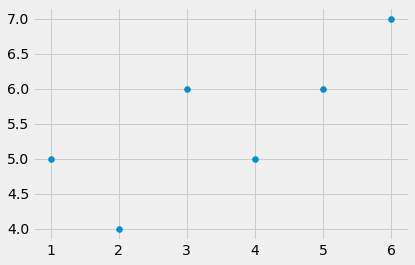

In [6]:
plt.scatter(Xs, Ys)
plt.show() #Making it a scatter plot

# Model

In [7]:
def best_fit_slope_and_intercept(Xs, Ys):
    m = ( ( (mean(Xs) * mean(Ys)) - (mean(Xs * Ys)) )/
         ( (mean(Xs)**2) - (mean(Xs**2)) ) )
    b = mean(Ys) - m*mean(Xs)
    return m, b


In [8]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [9]:
# Calculate quefficicient of determination
def coefficient_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_ys_orig = squared_error(ys_orig, y_mean_line)
    return 1- (squared_error_regr/squared_error_ys_orig)
    

In [16]:
Xs, Ys = create_dataset(40, 10, 2, correlation= 'pos')

In [17]:
m, b = best_fit_slope_and_intercept(Xs, Ys)
print(m, b)

1.9571294559099448 0.26097560975607337


In [18]:
regression_line = [(m*x)+b for x in Xs]

# Plot the best fit line

In [19]:
predict_x = 8
predict_y = (m*predict_x)+b

In [20]:
r_squared = coefficient_determination(Ys, regression_line)
print(r_squared)

0.9339435524530595


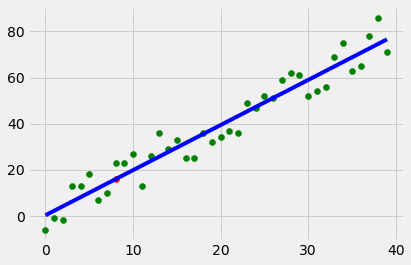

In [21]:
plt.scatter(Xs, Ys, color='g')
plt.scatter(predict_x, predict_y, color='r') # {predicted point}
plt.plot(Xs, regression_line, color='b')
plt.show()